##StockPredict101x

Build a RNN/LSTM/GRU model which can predict stock prices.

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense

In [13]:
# Define the ticker symbol and time period
ticker = 'TATAMOTORS.NS'
start_date = '2010-01-01'
end_date = '2022-12-31'

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [14]:
# Select the 'Close' price column
df = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))  #MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaled_data = scaler.fit_transform(df.values)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences of historical data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Number of previous days to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [15]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128,activation = 'relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=80, batch_size=32)

Epoch 1/80
80/80 [==============================] - 3s 20ms/step - loss: 0.0109
Epoch 2/80
80/80 [==============================] - 2s 20ms/step - loss: 3.0039e-04
Epoch 3/80
80/80 [==============================] - 2s 28ms/step - loss: 2.9593e-04
Epoch 4/80
80/80 [==============================] - 2s 27ms/step - loss: 3.0291e-04
Epoch 5/80
80/80 [==============================] - 2s 20ms/step - loss: 2.9299e-04
Epoch 6/80
80/80 [==============================] - 2s 21ms/step - loss: 2.9454e-04
Epoch 7/80
80/80 [==============================] - 2s 21ms/step - loss: 2.7334e-04
Epoch 8/80
80/80 [==============================] - 2s 21ms/step - loss: 2.7332e-04
Epoch 9/80
80/80 [==============================] - 2s 20ms/step - loss: 2.5728e-04
Epoch 10/80
80/80 [==============================] - 2s 30ms/step - loss: 2.5273e-04
Epoch 11/80
80/80 [==============================] - 2s 25ms/step - loss: 2.4699e-04
Epoch 12/80
80/80 [==============================] - 2s 21ms/step - loss: 2.64

In [16]:
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

20/20 [==============================] - 0s 4ms/step


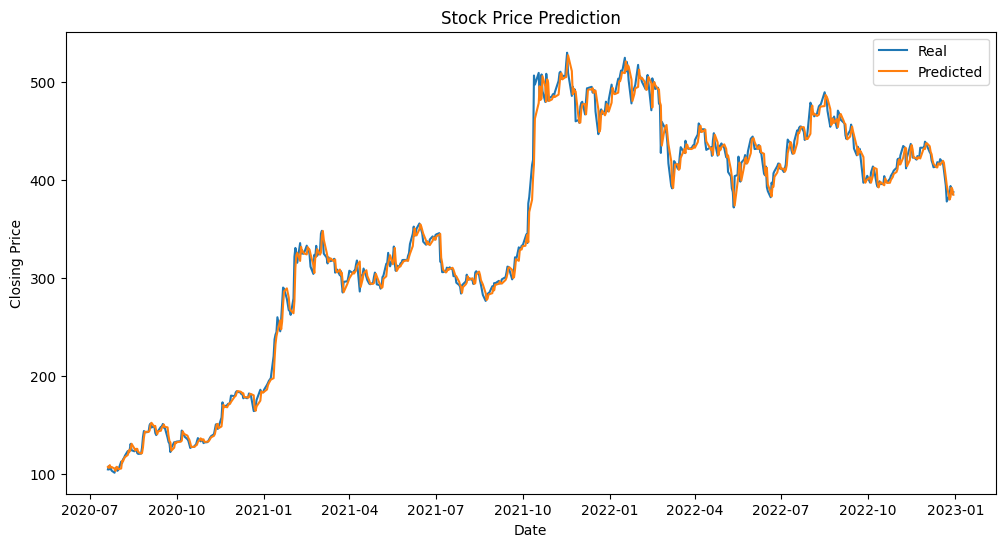

In [17]:
import seaborn as sns

Text(0.5, 1.0, 'The Stock Price of TATAMOTORS')

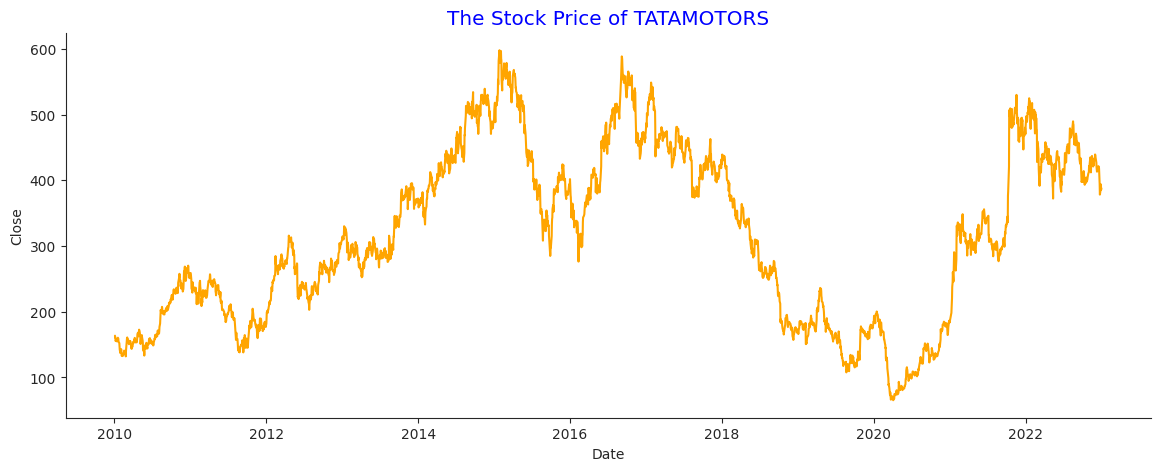

In [18]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="Date",y='Close',color='orange')
#sns.lineplot(x="Date",y='rnn_predictions',color='blue')
sns.despine()
plt.title("The Stock Price of TATAMOTORS",size='x-large',color='blue')